In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/Colab Notebooks/csv_file

/content/drive/MyDrive/Colab Notebooks/csv_file


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# path = r'C:\Users\layoc\OneDrive\Documents\VSCodeLearn\Life Expectancy Data.csv'
data = pd.read_csv('LifeExpectancy.csv')
cleanData = data.dropna()

#Variables for Multiple Linear Regression
X = cleanData[['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure',
               'Diphtheria ','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [7]:
#Importing ExtraTreeRegesor so we can predict from class labels of data points instead of numerical

from sklearn.tree import ExtraTreeRegressor, plot_tree

treeExtra = ExtraTreeRegressor(
    max_depth=5,              # Set the maximum depth of the tree
    min_samples_split=5,      # Set the minimum samples required to split a node
    min_samples_leaf=2,       # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,      # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)

treeExtra.fit(X_train, y_train)

yTreeTest_pred = treeExtra.predict(X_test)

In [ ]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, yTreeTest_pred)
r2_treeTest = r2_score(y_test, yTreeTest_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")
print(f"Decision Tree testing R squared: {r2_treeTest}")

Decision Tree testing data MSE: 11.334018260246998
Decision Tree testing R squared: 0.8404164773586441


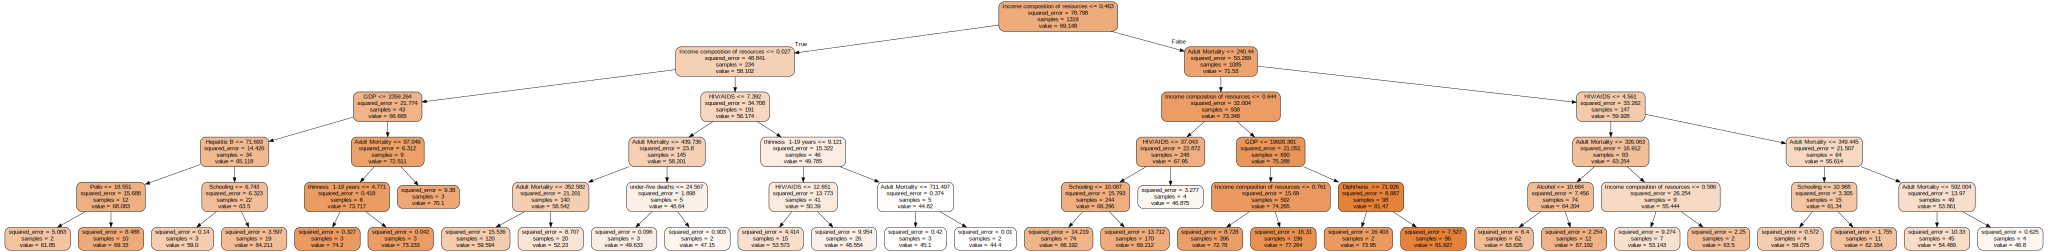

In [8]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    treeExtra,
    feature_names = X.columns,
    class_names = y,
    rounded=True,
    filled=True # 색 칠해줌
)

graphviz.Source(dot_data)

# petal = 꽃잎, sepal = 꽃받침